# TITLE: VISA APPROVAL PREDICTION

## Project Description

U.S. businesses are facing challenges in identifying and attracting qualified talent due to high demand for human resources. The Immigration and Nationality Act (INA) allows foreign workers to enter the U.S. under certain conditions, with the Office of Foreign Labor Certification (OFLC) overseeing the process of employer applications for labor certifications. In FY 2016, the OFLC processed over 775,000 employer applications, reflecting a 9% increase from the previous year, making the review process increasingly cumbersome. To address this, a Machine Learning-based solution is needed to streamline the visa approval process by automating candidate shortlisting and recommending visa certification or denial based on key factors that influence approval outcomes.

## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

    case_id: ID of each visa application
    continent: Information of continent the employee
    education_of_employee: Information of education of the employee
    has_job_experience: Does the employee has any job experience? Y= Yes; N = No
    requires_job_training: Does the employee require any job training? Y = Yes; N = No
    no_of_employees: Number of employees in the employer's company
    yr_of_estab: Year in which the employer's company was established
    region_of_employment: Information of foreign worker's intended region of employment in the US.
    prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
    unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
    full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
    case_status: Flag indicating if the Visa was certified or denied

# Package importation to help manupulate the data

In [5]:
## libraries for loading and preprocessing 
import numpy as np
import pandas as pd 

## libaries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## library for building a validation framwork
from sklearn.model_selection import train_test_split

## library for feature engineering 
from sklearn.feature_extraction import DictVectorizer

## libraries for ml algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

## libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## library for handling class imbalance
from imblearn.over_sampling import SMOTE

## ilbrary for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

## libraries for metrics and model evaluation 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


# Data Importation and General Overview

In [7]:
data = pd.read_csv('EasyVisa.csv')

In [8]:
#let us display the data to conform it is loaded
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [9]:
# let us create a copy of the data
df = data.copy()

In [10]:
#let us confirm the data copy by printing out
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [11]:
#let us view first 20 rows
df.head(20)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [12]:
#let us view last 20 rows
df.tail(20)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25460,EZYV25461,Europe,Master's,Y,Y,413,1997,West,8263.4700,Year,Y,Certified
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25462,EZYV25463,Europe,Bachelor's,N,Y,1715,2004,West,166032.6200,Year,Y,Denied
25463,EZYV25464,Asia,High School,N,N,444,1838,Midwest,213189.3600,Year,Y,Certified
25464,EZYV25465,Asia,Master's,N,N,48785,1974,South,145102.3600,Year,N,Certified
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25467,EZYV25468,North America,Master's,N,Y,2504,1882,Northeast,105900.6600,Year,Y,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.7400,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.4700,Year,N,Certified


In [13]:
## check for the total rows and columns and as a confirmation as displayed in cell 6
print(f'Total number of rows: {df.shape[0]} => Total number of columns: {df.shape[1]}')

Total number of rows: 25480 => Total number of columns: 12


In [14]:
## let us check a brief column summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# Notable Findings
--All rows and columns are filled</br>
--No Null values are seen</br>
--Column headings are lower case and follow proper naming norm using the underscore thus will not require any manupulation

In [16]:
## Let us confirm by checking missing values in the data
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [17]:
#let us check for the datatypes in each column 
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [18]:
# let us prieview a single row and juxtapose with the above cell to verify if the column data types will require manupulation
df.head(1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied


# Notable Findings
--The data types of the columns in the data correctly contain the data type by default however, it will be prudent to convert</br> 
'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment','full_time_position',  'case_status'</br> 
columns to <b>category</b> data type for better classification</br>
--yr_of_estab' will also be changed to datetime


# Data Preprocessing

In [21]:
#converting the above stated columns object data type to category data type
# List of columns to convert
categorical_columns = [
    'continent', 
    'education_of_employee', 
    'has_job_experience', 
    'requires_job_training', 
    'region_of_employment', 
    'full_time_position', 
    'case_status'
]
# Convert to category
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [22]:
# Convert year of estab to datetime
#df['yr_of_estab'] = pd.to_datetime(df['yr_of_estab'])

In [23]:
#let us confirm the conversion by printing the datatype of the columns
print(df.dtypes)

case_id                    object
continent                category
education_of_employee    category
has_job_experience       category
requires_job_training    category
no_of_employees             int64
yr_of_estab                 int64
region_of_employment     category
prevailing_wage           float64
unit_of_wage               object
full_time_position       category
case_status              category
dtype: object


In [24]:
#Let us briefly explore the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Notable Findings
--There are 25480 unique cases</br>
--Most of the employment is from Northeast region.</br>
--The dominant region is Asia</br>
--The dominant level of education is Bachelor's degree</br>
--The minimum value of no_of_employees is -26. This requires further investigation into that column

In [26]:
# let us investigate number of negative cases in the number of employees
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

# Notable Findings
--There are 33 cases of negative entries and as such we will consider them as entry errors</br>

In [28]:
#let us change the negatives into absolute values with the assumption that they are entry errors
df['no_of_employees'] = abs(df['no_of_employees'])



In [29]:
# let us check unique values in the categorical columns
categorical_columns = list(df.select_dtypes("category").columns)
for column in categorical_columns:
    print(df[column].value_counts())
    print("-" * 30) 

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
------------------------------
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
------------------------------
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64
------------------------------


# Feature Exploration

In [31]:
#let us create a barplot to explore our features
def barplot(df, feature, figsize=(8, 6)):
    """
    Barplot for a given categorical feature with different colors for each bar and percentage labels.

    Parameters:
        df (DataFrame): The dataframe containing the data.
        feature (str): The categorical column to create the barplot for.
        figsize (tuple): Size of the figure (default is (8, 6)).
    """
    total = len(df[feature])  # Total number of records for percentage calculation
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=feature, hue=feature, palette='Set3', legend=False)  # Set 'hue' to the same feature

    # Annotate each bar with the percentage
    for p in ax.patches:
        height = p.get_height()  # Get the height of each bar
        percentage = 100 * height / total  # Calculate percentage
        ax.annotate(f'{percentage:.1f}%',  # Format percentage with 1 decimal place
                    (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(f"{feature.capitalize()} Distribution", fontsize=16)
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()


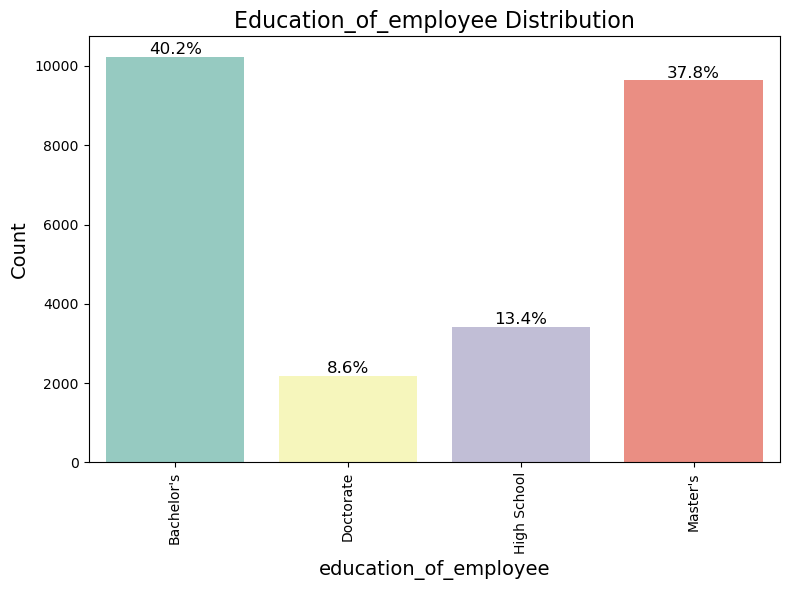

In [32]:
#let us explore the educational level
barplot(df, 'education_of_employee')


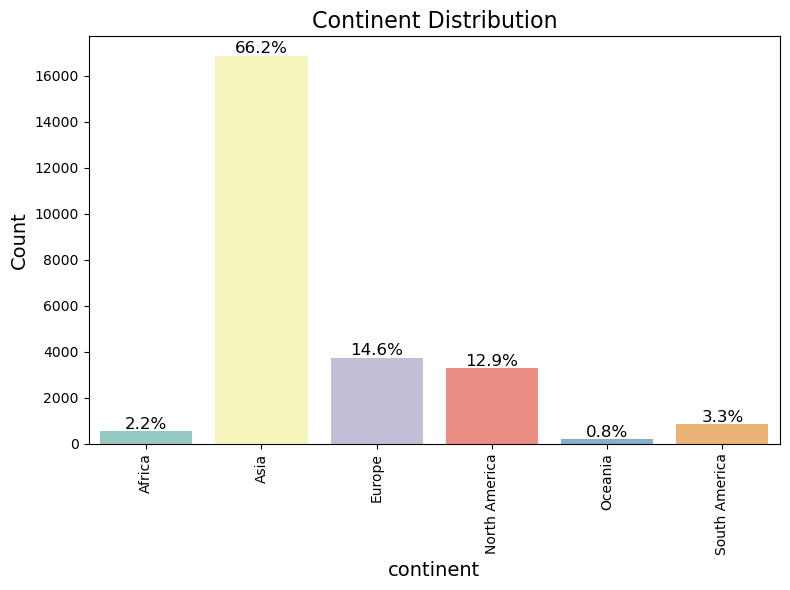

In [33]:
#let us explore the continent
barplot(df, 'continent')

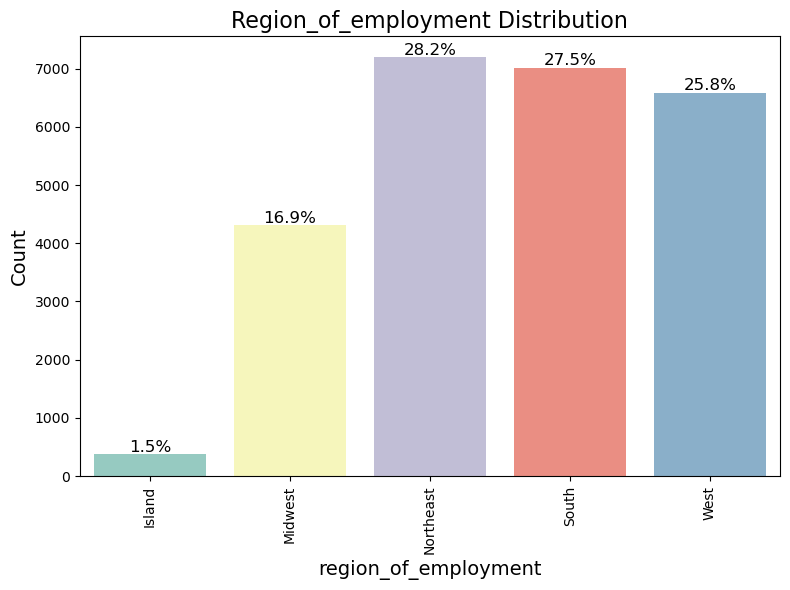

In [34]:
#let us explore the region of employment
barplot(df, 'region_of_employment')

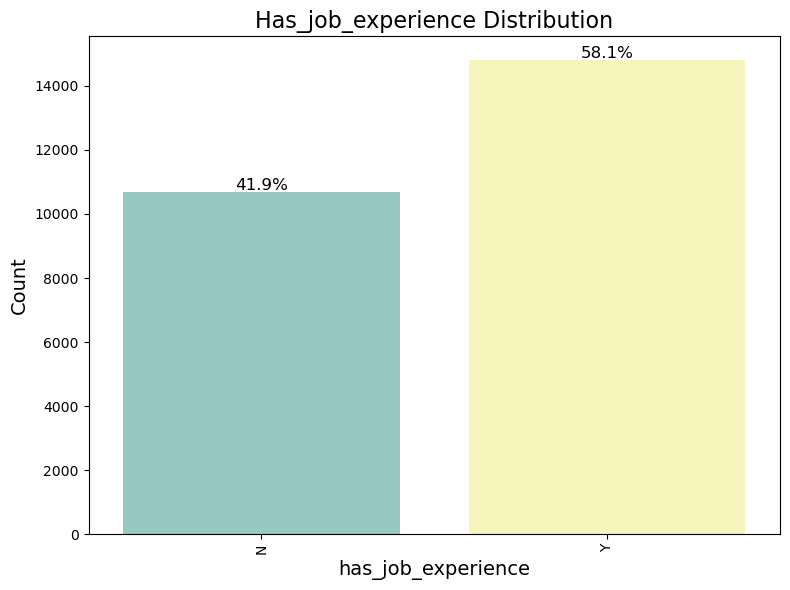

In [35]:
#let us explore the job experience
barplot(df, 'has_job_experience')


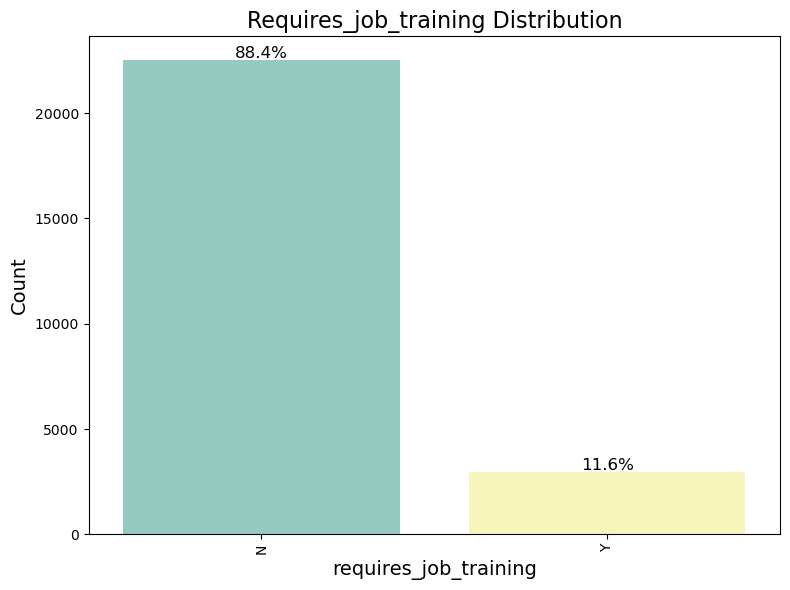

In [36]:
#let us explore job training requirement
barplot(df, 'requires_job_training')

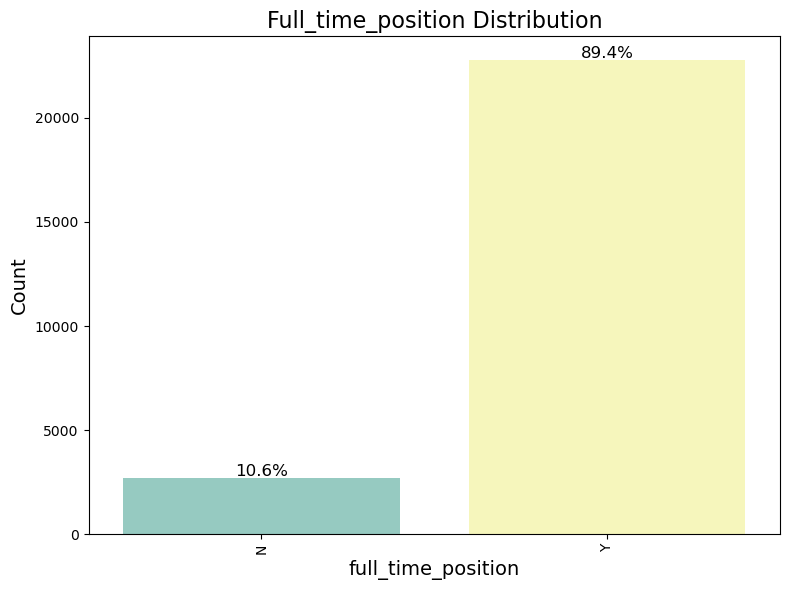

In [37]:
#let us explore jop position type
barplot(df, 'full_time_position')


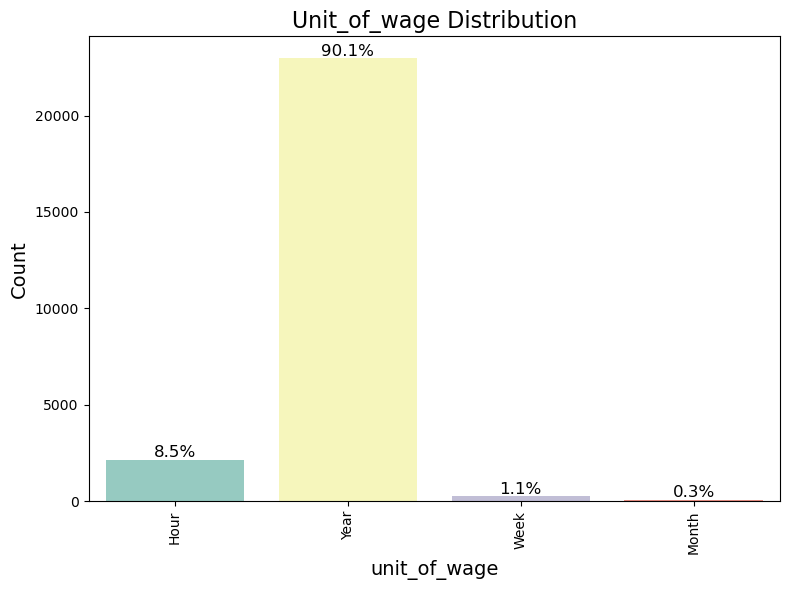

In [38]:
#let us explore the unit of wage
barplot(df, 'unit_of_wage')


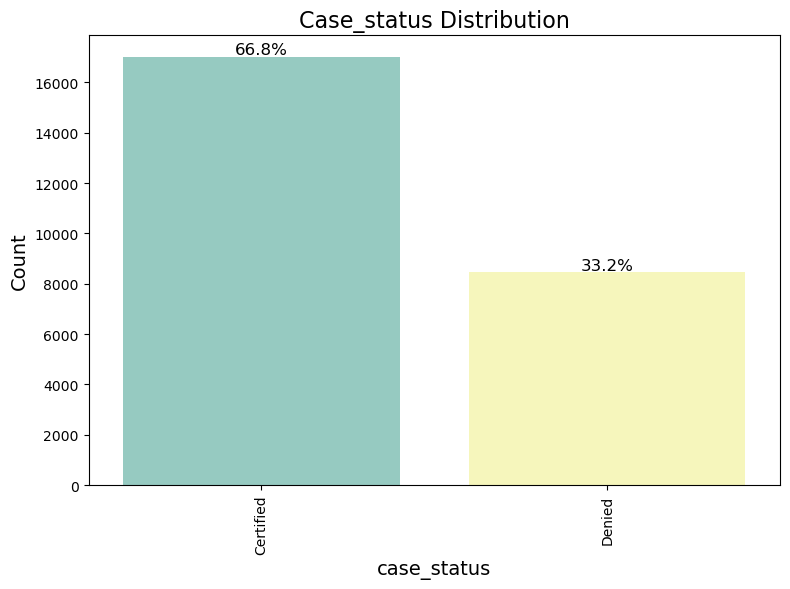

In [39]:
barplot(df, 'case_status')


# Notable Findings
From the exploration,</br>
--Bachelors degree is the dominant educational level with 40.2%</br>
--Asia is the dominant continent with 66.2%</br>
--Northeast is the dominant region of employment with 28.2%</br>
--Applicants with job experience dominate with 58.1%</br>
--Applicants who do not require job training dominate with 88.4%</br>
--89.4% of the applicants have full time job positions
--66.8% were visa certified

In [41]:
df.dtypes


case_id                    object
continent                category
education_of_employee    category
has_job_experience       category
requires_job_training    category
no_of_employees             int64
yr_of_estab                 int64
region_of_employment     category
prevailing_wage           float64
unit_of_wage               object
full_time_position       category
case_status              category
dtype: object

# Finding the correlation between the numerical columns

In [43]:
# let us select the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Find the correlation between the numerical columns
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                 no_of_employees  yr_of_estab  prevailing_wage
no_of_employees         1.000000    -0.017770        -0.009523
yr_of_estab            -0.017770     1.000000         0.012342
prevailing_wage        -0.009523     0.012342         1.000000


# Representing the correlation on a heatmap

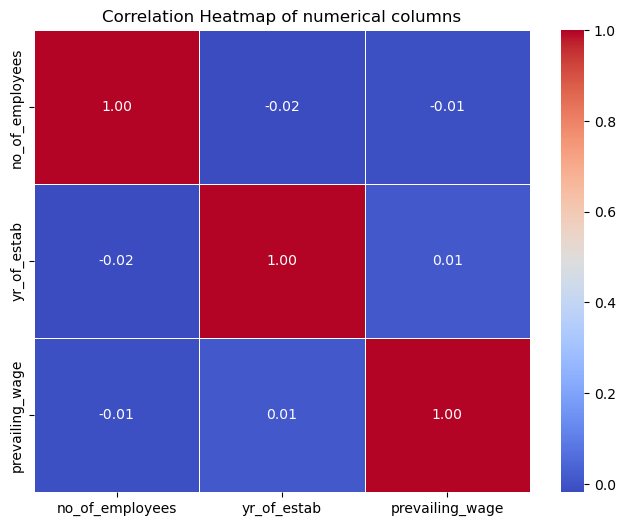

In [45]:
# Creating a heatmap to represent correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of numerical columns")
plt.show()

# Notable findings
no_of_employees and yr_of_estab (-0.017770):</br>
The near-zero correlation indicates no significant linear relationship between the number of employees and the year of establishment.</br>

no_of_employees and prevailing_wage (-0.009523):</br>
The near-zero correlation suggests no significant linear relationship between the number of employees and the prevailing wage.</br>

yr_of_estab and prevailing_wage (0.012342):
A small positive correlation indicates a very weak or negligible linear relationship between the year of establishment and the prevailing wage.</br>

-- In General, the correlations between these variables are very close to zero, suggesting weak or no linear relationships.

In [47]:
def side_by_side_barplot(df, category1, category2, figsize=(10, 6)):
    """
    Creates a side-by-side barplot for the relationship between two categorical variables,
    with percentages displayed on each bar.

    Parameters:
        df (DataFrame): The dataframe containing the data.
        category1 (str): The primary categorical variable for the x-axis.
        category2 (str): The secondary categorical variable for grouping.
        figsize (tuple): Size of the figure (default is (10, 6)).
    """
    # Generate a crosstab for the two categories
    category_count = pd.crosstab(df[category1], df[category2])

    # Calculate the percentages
    category_percent = category_count.div(category_count.sum(axis=1), axis=0) * 100

    # Define specific colors for Certified and Denied
    color_map = {
        'Certified': 'green',
        'Denied': 'red',
    }

    # Get the unique categories for the secondary variable
    categories = category_count.columns

    # Bar width and positioning
    bar_width = 0.35
    x = range(len(category_count))

    # Plot the bars side-by-side
    plt.figure(figsize=figsize)
    for i, category in enumerate(categories):
        offset = bar_width * i
        plt.bar(
            [pos + offset for pos in x],
            category_count[category],
            bar_width,
            label=category,
            color=color_map.get(category, 'gray')
        )

        # Add percentages on the bars
        for pos, count, percent in zip(
            [pos + offset for pos in x], 
            category_count[category], 
            category_percent[category]
        ):
            plt.text(
                pos, 
                count + 0.02 * category_count.values.max(),  # Position above the bar
                f'{percent:.1f}%', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black'
            )

    # Add labels and title
    plt.xlabel(category1.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Side-by-Side Bar Chart of {category1.capitalize()} vs {category2.capitalize()} with Percentages', fontsize=16)

    # Customize x-axis ticks
    plt.xticks([pos + bar_width / 2 for pos in x], category_count.index, rotation=45, fontsize=12)
    plt.legend(title=category2.capitalize(), fontsize=12)
    plt.tight_layout()
    plt.show()


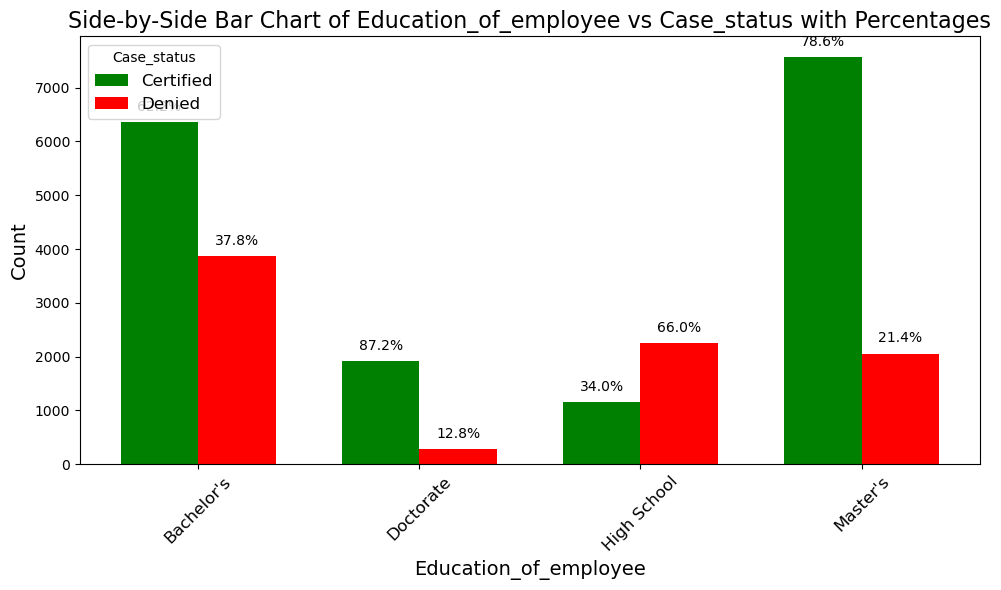

In [48]:
# let us crosstab 'education_of_employee' and 'case_status'
side_by_side_barplot(df, 'education_of_employee', 'case_status')


# Notable Findings
--From the graph above, it is seen that more of those with higher education(Tertiary) were certified as against those with lower education(high School)
--It is also seen that more of those with higher education(Tertiary) may want to travel abroad for a well paid job.

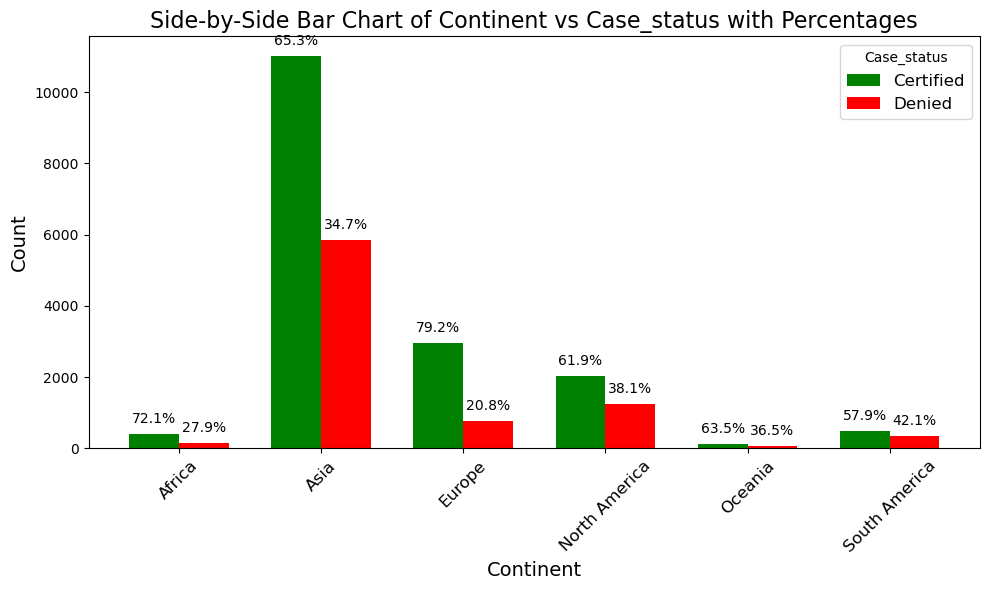

In [50]:
# let us crosstab 'education_of_employee' and 'case_status'
side_by_side_barplot(df, 'continent', 'case_status')


# Notable Findings
--Asia has the highest number applicants but per the continent analysis, Europe has the highest proportion of certified cases wheres<br>
South America has the highest denials.<br>

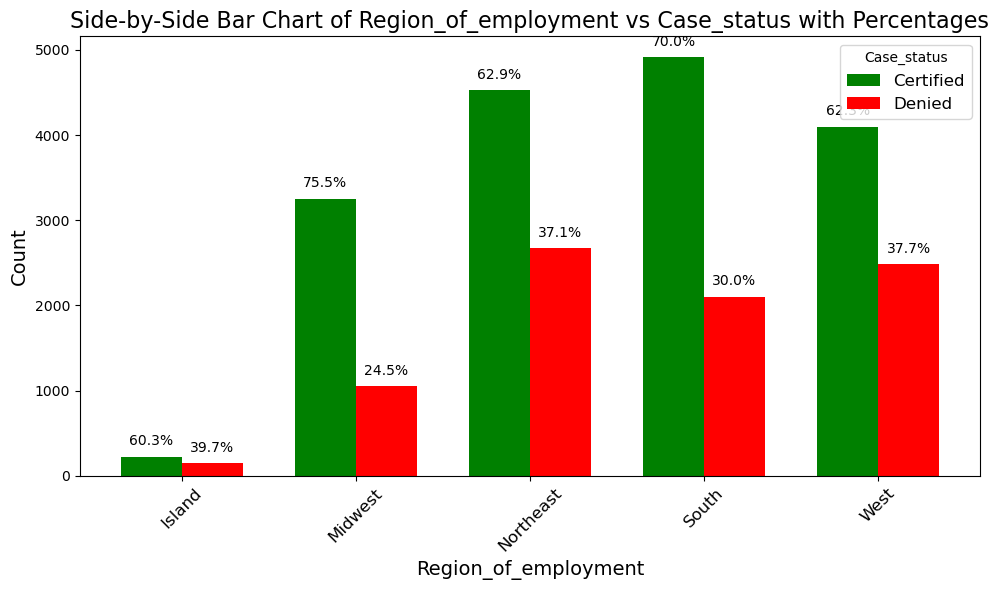

In [52]:
# let us crosstab 'region_of_employment' and 'case_status'
side_by_side_barplot(df, 'region_of_employment', 'case_status')

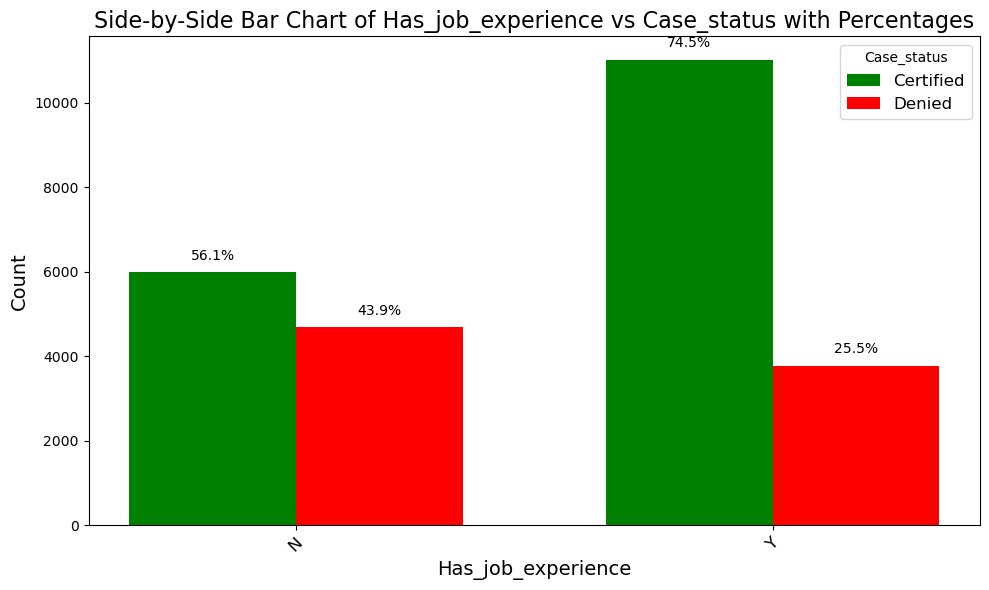

In [53]:
# let us crosstab 'has_job_experience' and 'case_status'
side_by_side_barplot(df, 'has_job_experience', 'case_status')

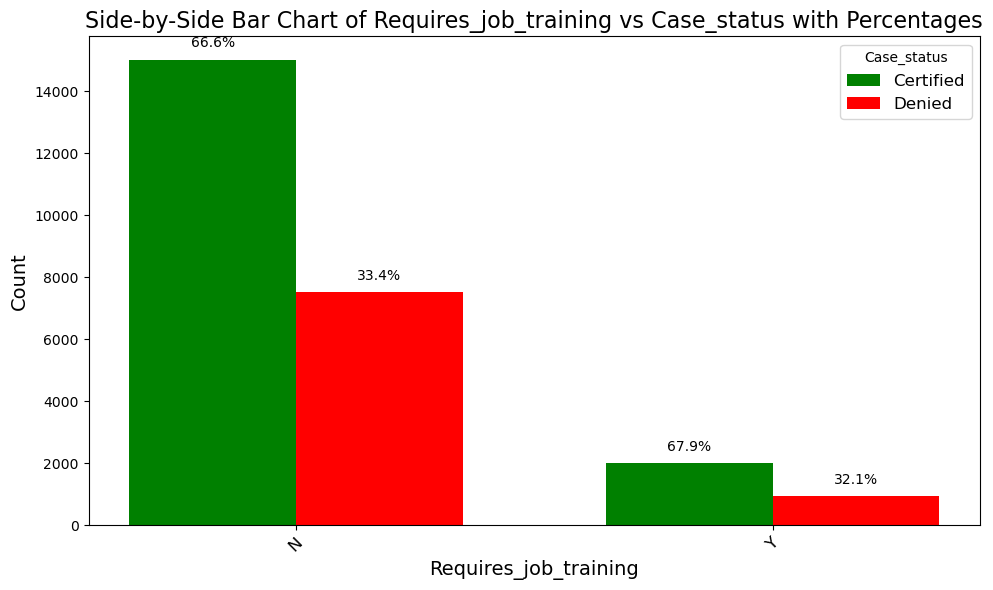

In [54]:
# let us crosstab 'requires_job_training' and 'case_status'
side_by_side_barplot(df, 'requires_job_training', 'case_status')

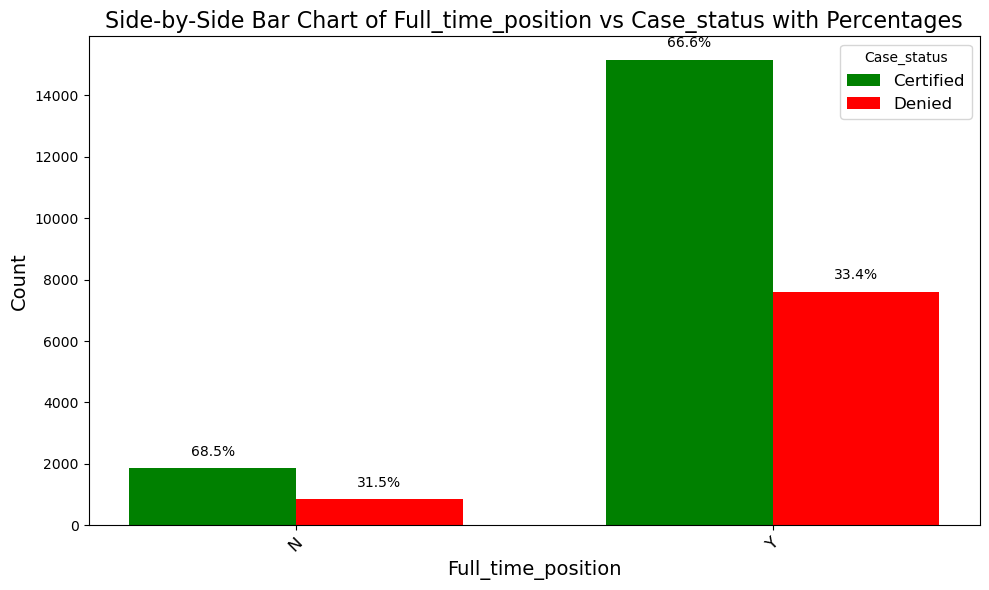

In [55]:
# let us crosstab 'requires_job_training' and 'case_status'
side_by_side_barplot(df, 'full_time_position', 'case_status')

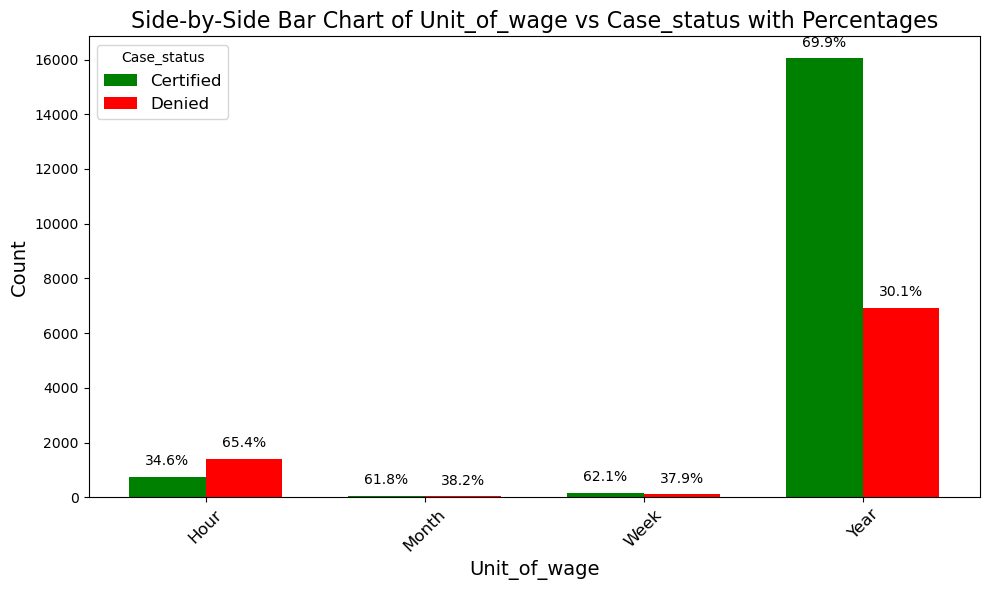

In [56]:
# let us crosstab 'unit_of_wage' and 'case_status'
side_by_side_barplot(data, "unit_of_wage", "case_status")



In [57]:
def wage_crosstab_and_plot(df, numerical_col, category_col, bins=3, bin_labels=['Low', 'Medium', 'High'], figsize=(10, 6)):
    """
    Bins a numerical column into 'Low', 'Medium', and 'High' categories and creates a crosstab with a categorical column.
    Then visualizes the crosstab as a side-by-side barplot with percentages.

    Parameters:
        df (DataFrame): The dataframe containing the data.
        numerical_col (str): The numerical column to bin.
        category_col (str): The categorical column to cross-tabulate.
        bins (int or list): Number of bins or bin edges (default is 3).
        bin_labels (list): Labels for the bins (default is ['Low', 'Medium', 'High']).
        figsize (tuple): Size of the figure (default is (10, 6)).
    """
    # Automatically calculate bin edges based on the data
    if isinstance(bins, int):
        bin_edges = np.linspace(df[numerical_col].min(), df[numerical_col].max(), bins + 1)
    else:
        bin_edges = bins

    # Bin the numerical column
    df['binned_wage'] = pd.cut(df[numerical_col], bins=bin_edges, labels=bin_labels, include_lowest=True)

    # Create the crosstab
    category_count = pd.crosstab(df['binned_wage'], df[category_col])

    # Calculate percentages for each group
    category_percent = category_count.div(category_count.sum(axis=1), axis=0) * 100

    # Print the crosstab
    print("Crosstab of Binned Wages vs Case Status:")
    print(category_count)

    # Define specific colors for each category
    color_map = {
        'Certified': 'green',
        'Denied': 'red',
    }

    # Get the unique categories for the categorical variable
    categories = category_count.columns

    # Bar width and positioning
    bar_width = 0.35
    x = range(len(category_count))

    # Plot the bars side by side
    plt.figure(figsize=figsize)
    for i, category in enumerate(categories):
        offset = bar_width * i
        plt.bar(
            [pos + offset for pos in x],
            category_count[category],
            bar_width,
            label=category,
            color=color_map.get(category, 'gray')
        )

        # Add percentages on the bars
        for pos, count, percent in zip(
            [pos + offset for pos in x], 
            category_count[category], 
            category_percent[category]
        ):
            plt.text(
                pos, 
                count + 0.02 * category_count.values.max(),  # Position above the bar
                f'{percent:.1f}%', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black'
            )

    # Add labels and title
    plt.xlabel('Binned ' + numerical_col.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Bar Chart of Binned {numerical_col.capitalize()} vs {category_col.capitalize()} with Percentages', fontsize=16)

    # Customize x-axis ticks
    plt.xticks([pos + bar_width / 2 for pos in x], category_count.index, rotation=45, fontsize=12)
    plt.legend(title=category_col.capitalize(), fontsize=12)
    plt.tight_layout()
    plt.show()


Crosstab of Binned Wages vs Case Status:
case_status  Certified  Denied
binned_wage                   
Low              12502    6412
Medium            4151    1934
High               365     116


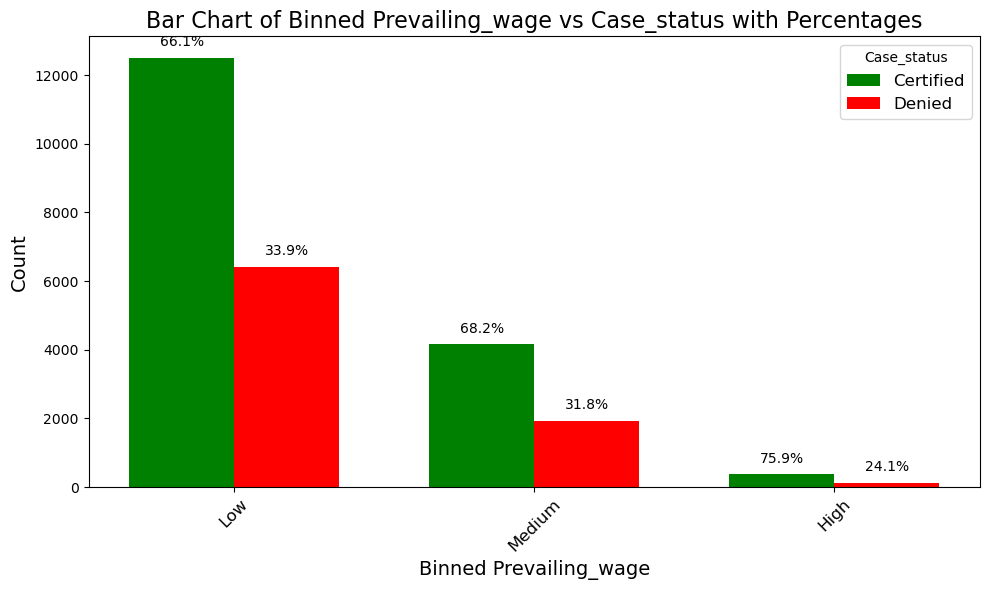

In [58]:
# 
wage_crosstab_and_plot(
    df,
    numerical_col='prevailing_wage',
    category_col='case_status',
    bins=3, 
    bin_labels=['Low', 'Medium', 'High']
)


In [59]:
def yr_of_estab_crosstab_and_plot(df, numerical_col, category_col, bins, labels, figsize=(10, 6)):
    """
    Bins a numerical column (`yr_of_estab`) into custom categories and creates a crosstab with a categorical column.
    Then visualizes the crosstab as a side-by-side barplot with percentages.

    Parameters:
        df (DataFrame): The dataframe containing the data.
        numerical_col (str): The numerical column to bin (e.g., 'yr_of_estab').
        category_col (str): The categorical column to cross-tabulate (e.g., 'case_status').
        bins (list): Custom bin edges for the numerical column.
        labels (list): Labels for the bins.
        figsize (tuple): Size of the figure (default is (10, 6)).
    """
    # Bin the numerical column
    df['yr_of_estab_binned'] = pd.cut(df[numerical_col], bins=bins, labels=labels)

    # Create the crosstab
    category_count = pd.crosstab(df['yr_of_estab_binned'], df[category_col])

    # Calculate percentages for each group
    category_percent = category_count.div(category_count.sum(axis=1), axis=0) * 100

    # Print the crosstab
    print("Crosstab of Binned Years of Establishment vs Case Status:")
    print(category_count)

    # Define specific colors for each category
    color_map = {
        'Certified': 'green',
        'Denied': 'red',
    }

    # Get the unique categories for the categorical variable
    categories = category_count.columns

    # Bar width and positioning
    bar_width = 0.35
    x = range(len(category_count))

    # Plot the bars side by side
    plt.figure(figsize=figsize)
    for i, category in enumerate(categories):
        offset = bar_width * i
        plt.bar(
            [pos + offset for pos in x],
            category_count[category],
            bar_width,
            label=category,
            color=color_map.get(category, 'gray')
        )

        # Add percentages on the bars
        for pos, count, percent in zip(
            [pos + offset for pos in x], 
            category_count[category], 
            category_percent[category]
        ):
            plt.text(
                pos, 
                count + 0.02 * category_count.values.max(),  # Position above the bar
                f'{percent:.1f}%', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black'
            )

    # Add labels and title
    plt.xlabel('Year of Establishment', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Side-by-Side Bar Chart of Binned {numerical_col.capitalize()} vs {category_col.capitalize()} with Percentages', fontsize=16)

    # Customize x-axis ticks
    plt.xticks([pos + bar_width / 2 for pos in x], category_count.index, rotation=45, fontsize=12)
    plt.legend(title=category_col.capitalize(), fontsize=12)
    plt.tight_layout()
    plt.show()


Crosstab of Binned Years of Establishment vs Case Status:
case_status         Certified  Denied
yr_of_estab_binned                   
Before 1990              6581    3369
1990-2000                3841    2026
2000-2010                5361    2497
After 2010               1235     570


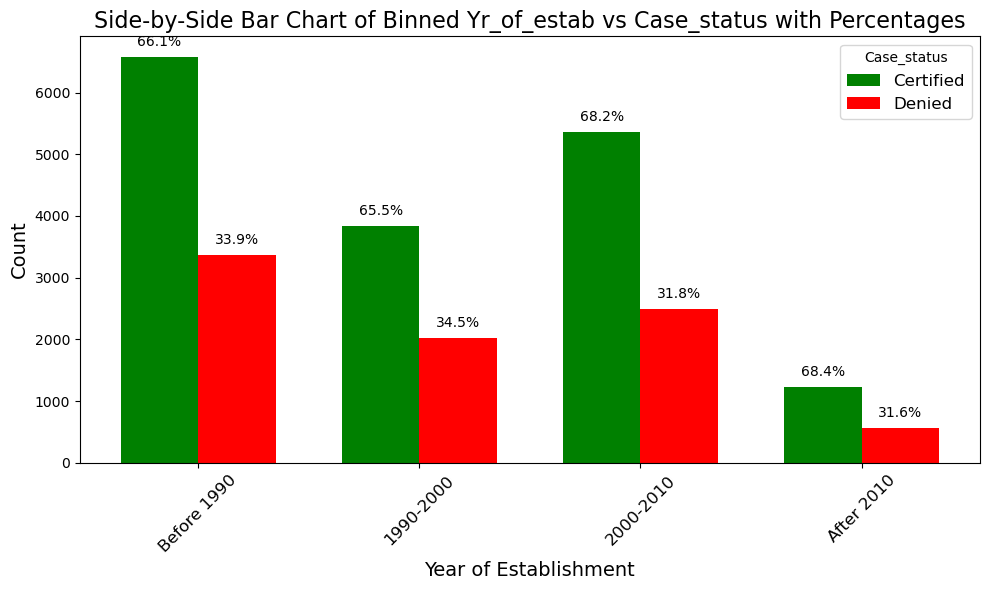

In [60]:
# Define bins and labels for `yr_of_estab`
bins = [-np.inf, 1990, 2000, 2010, np.inf]  # Define year ranges
labels = ["Before 1990", "1990-2000", "2000-2010", "After 2010"]  # Labels for bins

# Call the function
yr_of_estab_crosstab_and_plot(
    df, 
    numerical_col='yr_of_estab', 
    category_col='case_status', 
    bins=bins, 
    labels=labels
)


# Data Preprocessing 2

In [62]:
#converting the above stated columns object data type to category data type
# List of columns to convert
categorical_columns = [
    'continent', 
    'education_of_employee', 
    'has_job_experience', 
    'requires_job_training', 
    'region_of_employment', 
    'full_time_position', 
    'case_status'
]
# Convert to category
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Building Validation Framework
--Training Dataset 60%<br>
--Validation Dataset 20%<br>
--Testing Dataset 20%

In [64]:
X = df.drop(columns=['case_status', 'case_id'])  # Feature matrix
y = df['case_status']                # target variable

# Step 1: Split into 80% training-validation and 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split 80% training-validation into 60% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# Print the shapes of the splits
print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")


Training set: X_train=(15288, 12), y_train=(15288,)
Validation set: X_val=(5096, 12), y_val=(5096,)
Test set: X_test=(5096, 12), y_test=(5096,)


In [65]:
# preprocess target variable
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [66]:
# Convert to dictionary format
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')
X_test_dict = X_test.to_dict(orient='records')

In [67]:
dv = DictVectorizer(sparse=False)

dv.fit(X_train_dict)

DictVectorizer(sparse=False)

In [68]:
#  Fit and Transform Training Data
X_train_encoded = dv.fit_transform(X_train_dict)

In [69]:
# Transform Validation and Testing Data
X_val_encoded = dv.transform(X_val_dict)
X_test_encoded = dv.transform(X_test_dict)

# Training Baseline Model

In [70]:
# Logistic Regression Model
lr_bl_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
lr_bl_model.fit(X_train_encoded, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [71]:
# Validate the model
y_val_pred = lr_bl_model.predict(X_val_encoded)

In [72]:
# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)

# Update precision, recall, and f1 to use categorical labels
precision = precision_score(y_val, y_val_pred, average='binary', pos_label='Certified')
recall = recall_score(y_val, y_val_pred, average='binary', pos_label='Certified')
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label='Certified')

# Print the evaluation results
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Logistic Regression Accuracy: 66.80%
Precision: 0.67
Recall: 1.00
F1 Score: 0.80


# Logistic Regression Model

In [73]:
dv = DictVectorizer(sparse=False)

dv.fit(X_train_dict)

DictVectorizer(sparse=False)

In [74]:
#  Fit and Transform Training Data
X_train_encoded = dv.fit_transform(X_train_dict)

In [75]:
# Transform Validation and Testing Data
X_val_encoded = dv.transform(X_val_dict)
X_test_encoded = dv.transform(X_test_dict)

In [76]:
#  handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique) 
#  helps in balancing the classes for better model performance when class imbalance is present.

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

In [77]:
# feature scaling : standardizes the features by scaling them to have zero mean and unit variance. 
# this is important for machine learning algorithms that are sensitive to feature scaling like logistic regression.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [78]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, class_weight='balanced') # class_weight='balanced' accounts for class imbalance

# Hyperparameter tuning  
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
lr_grid_search.fit(X_train_scaled, y_train_smote)
lr_model = lr_grid_search.best_estimator_

# Train the model
lr_model.fit(X_train_scaled, y_train_smote)


LogisticRegression(C=10, class_weight='balanced', random_state=42)

In [79]:
# Validate the model
y_val_pred = lr_model.predict(X_val_scaled)


In [80]:
# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='binary', pos_label='Certified')
recall = recall_score(y_val, y_val_pred, average='binary', pos_label='Certified')
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label='Certified')

# Print the evaluation results
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Logistic Regression Accuracy: 69.82%
Precision: 0.81
Recall: 0.71
F1 Score: 0.76


In [81]:
# make predictions on the validation set
predictions = lr_model.predict(X_val_scaled)
print("Predictions on Validation Set:")
print(predictions)

Predictions on Validation Set:
['Denied' 'Certified' 'Denied' ... 'Denied' 'Certified' 'Denied']


# Random Forest Classifier

In [83]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter tuning 
rf_param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train_smote)
rf_model = rf_grid_search.best_estimator_


# Train the model
rf_model.fit(X_train_scaled, y_train_smote)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [84]:
# Validate the model
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Calculate accuracy and other metrics for Random Forest
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf, average='binary', pos_label='Certified')
recall_rf = recall_score(y_val, y_val_pred_rf, average='binary', pos_label='Certified')
f1_rf = f1_score(y_val, y_val_pred_rf, average='binary', pos_label='Certified')

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Random Forest Accuracy: 75.16%
Precision: 0.78
Recall: 0.87
F1 Score: 0.82


In [85]:
# make predictions on the validation set
predictions_rf = rf_model.predict(X_val_scaled)
print("Predictions on Validation Set:")
print(predictions_rf)

Predictions on Validation Set:
['Denied' 'Certified' 'Certified' ... 'Certified' 'Certified' 'Certified']


# Training & Testing Final Model

In [87]:
# Random Forest Test Evaluation
y_test_pred_rf = rf_model.predict(X_test_scaled)

accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf, average='binary', pos_label='Certified', zero_division=1)
recall_test_rf = recall_score(y_test, y_test_pred_rf, average='binary', pos_label='Certified', zero_division=1)
f1_test_rf = f1_score(y_test, y_test_pred_rf, average='binary', pos_label='Certified', zero_division=1)

print(f"Random Forest Test Accuracy: {accuracy_test_rf * 100:.2f}%")
print(f"Test Precision: {precision_test_rf:.2f}")
print(f"Test Recall: {recall_test_rf:.2f}")
print(f"Test F1 Score: {f1_test_rf:.2f}")

Random Forest Test Accuracy: 74.47%
Test Precision: 0.78
Test Recall: 0.86
Test F1 Score: 0.82


# Notable Findings

#### * Accuracy: This tells you how often the model is correct overall. Random Forest has a higher accuracy than Logistic Regression, which suggests it is better at making correct classifications overall.<br>
#### * Precision: This is about how many of the applicants the model said should be approved, actually deserved approval. Logistic Regression has higher precision, meaning it’s better at minimizing false positives (e.g., fewer non-certified cases classified as certified).<br>
#### * Recall: This is about how good the model is at catching all the true positive cases (those who should be approved). It answers the question: Of all the people who should be approved, how many did the model correctly identify? Random Forest has better recall, meaning it identifies more actual certified cases than Logistic Regression.<br>
#### * F1 Score: The F1 score combines precision and recall into one number. It’s helpful when you want a balance between both (especially if there’s a trade-off). A high F1 score means the model is good at both not making false positive mistakes (precision) and catching the true positives (recall).The F1 score is higher for Random Forest, indicating a better balance between precision and recall.

# Conclusion

Based on the results from both Logistic Regression and Random Forest models, we have successfully identified key patterns that can be leveraged to streamline the visa approval or denial process. These models help the Office of Foreign Labor Certification (OFLC) make more efficient and data-driven decisions by:

### *Automating the classification of applicants:*
Predicting whether an applicant is likely to be Certified or Denied based on their profile.

### 1. **Overview of the Data:**
The dataset includes information from individuals and companies from various global regions. Below is a summary of the key features in the data:
- **Continents:** The data contains records from different continents, including Asia, Europe, North America, etc.
- **Education:** Information about the highest education level of the employees (e.g., High School, Bachelor’s, Master’s, etc.).
- **Job Experience:** A feature indicating whether the employee has relevant job experience.
- **Training:** Indicates if training was required for the job.
- **Salary:** The dataset includes wage details (whether hourly, monthly, weekly, or yearly).
- **Case Status:** The outcome for each case—whether the visa application was approved (Certified) or denied.

### 2. **Key Insights from the Data:**
Several important factors were identified to influence the likelihood of an applicant’s visa being approved or denied:
- **Geography:** Applicants from Asia represent the largest group and also have the highest number of denied cases. North America and Europe show a more balanced mix of approvals and denials.
- **Education:** Individuals with higher education levels, such as a Bachelor's or Master’s degree, are more likely to be approved. Those with a High School education are less likely to be certified.
- **Job Experience:** Applicants with job experience are more likely to be approved, whereas those without it have a higher chance of denial.
- **Wages:** Higher wages are correlated with a higher likelihood of visa approval, especially for those on yearly salaries.
- **Training Requirements:** People who do not require job training are more likely to get approved. The cases that required training had a slightly lower approval rate.

### 3. **Model Performance:**
We built predictive models using Logistic Regression and Random Forest to forecast visa approvals. Here’s how each model performed:
- **Random Forest Model:** Achieved an accuracy of 75%, successfully predicting the visa outcome 75% of the time.
- **Logistic Regression Model:** Had a slightly lower accuracy of 69.7%, but still provided valuable insights into the relationships between features and outcomes.

These models help us understand the driving factors behind approvals and denials. For example, an applicant with a Master’s degree, high salary, and job experience is more likely to have their application approved.

### 4. **Implications for Decision-Makers:**
The insights from these models can inform decisions at multiple levels:
- **Educational Level:** Employers may want to focus on hiring individuals with higher educational qualifications (like a Bachelor’s or Master’s degree), as these applicants have a higher likelihood of their visa applications being approved.
- **Job Experience:** Employers should prioritize candidates with relevant job experience, as it significantly improves the chances of visa approval.
- **Wages:** Offering competitive wages, especially high salaries, is another factor that increases the probability of visa approval.
- **Training:** If training is not required for the job, applicants are more likely to receive a positive result.

### 5. **How This Helps:**
This analysis helps decision-makers by:
- Identifying the key factors that influence whether a visa application is approved or denied.
- Streamlining the decision-making process for employers and organizations by focusing on the most impactful factors.
- Providing predictive capabilities to forecast the likelihood of future visa approval based on similar cases, thus aiding applicants in making informed decisions.

### In Conclusion:
The data-driven insights and machine learning models confirm that factors such as education, job experience, wages, and training requirements significantly impact visa approval outcomes. By understanding these trends, companies can make better hiring decisions, and applicants can improve their chances of visa approval.

### *Providing data-driven recommendations:*
These models assist decision-makers in identifying which applicants have a higher chance of visa approval.

### *Highlighting key factors influencing visa decisions:*
The models emphasize the importance of education, job experience, region, and wage in the decision-making process.
